In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from random import randint
from math import sqrt
from sklearn.metrics import silhouette_score
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [9]:
#pre-processing
read_file=open("/home/campus.stonybrook.edu/pdutta/Github/BMI_Bootcamp_2023/Data_set/Synthetic_dataset/4D_data_new.txt",'r')
read_content= read_file.read()

In [10]:
all_data= read_content.splitlines()
No_data_points=len(all_data)
print ("Number of the data points :- ", No_data_points)
features = all_data[0].split("\t")
No_of_features = len(features)
print ("Number the features/samples :- ", No_of_features)

Number of the data points :-  20
Number the features/samples :-  4


In [11]:
a=np.zeros((No_data_points,No_of_features))
counter = 0
for lines in all_data:
    values=lines.split('\t')
    for i in range(0,No_of_features):
        a[counter][i]= values[i]
    counter+=1
    
#print a    # If you want to see the whole dataset

# Call hierarchical clustering, linkage can be  = ['complete', 'average', 'ward']

In [12]:
linkage_style= "average"

for i in range(2,4):
    agglomerative = cluster.AgglomerativeClustering(n_clusters=i, linkage=linkage_style, affinity='euclidean')
    idx = agglomerative.fit_predict(a)
    hlabels = agglomerative.labels_ 
    print (hlabels) 
    score = silhouette_score(a,hlabels)
    print ("Silhouette Score", score)

[1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
Silhouette Score 0.8035482968672308
[1 1 1 1 1 0 1 1 2 0 1 1 1 1 1 1 1 1 1 1]
Silhouette Score 0.7495914349843531


/shared/software/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/shared/software/anaconda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


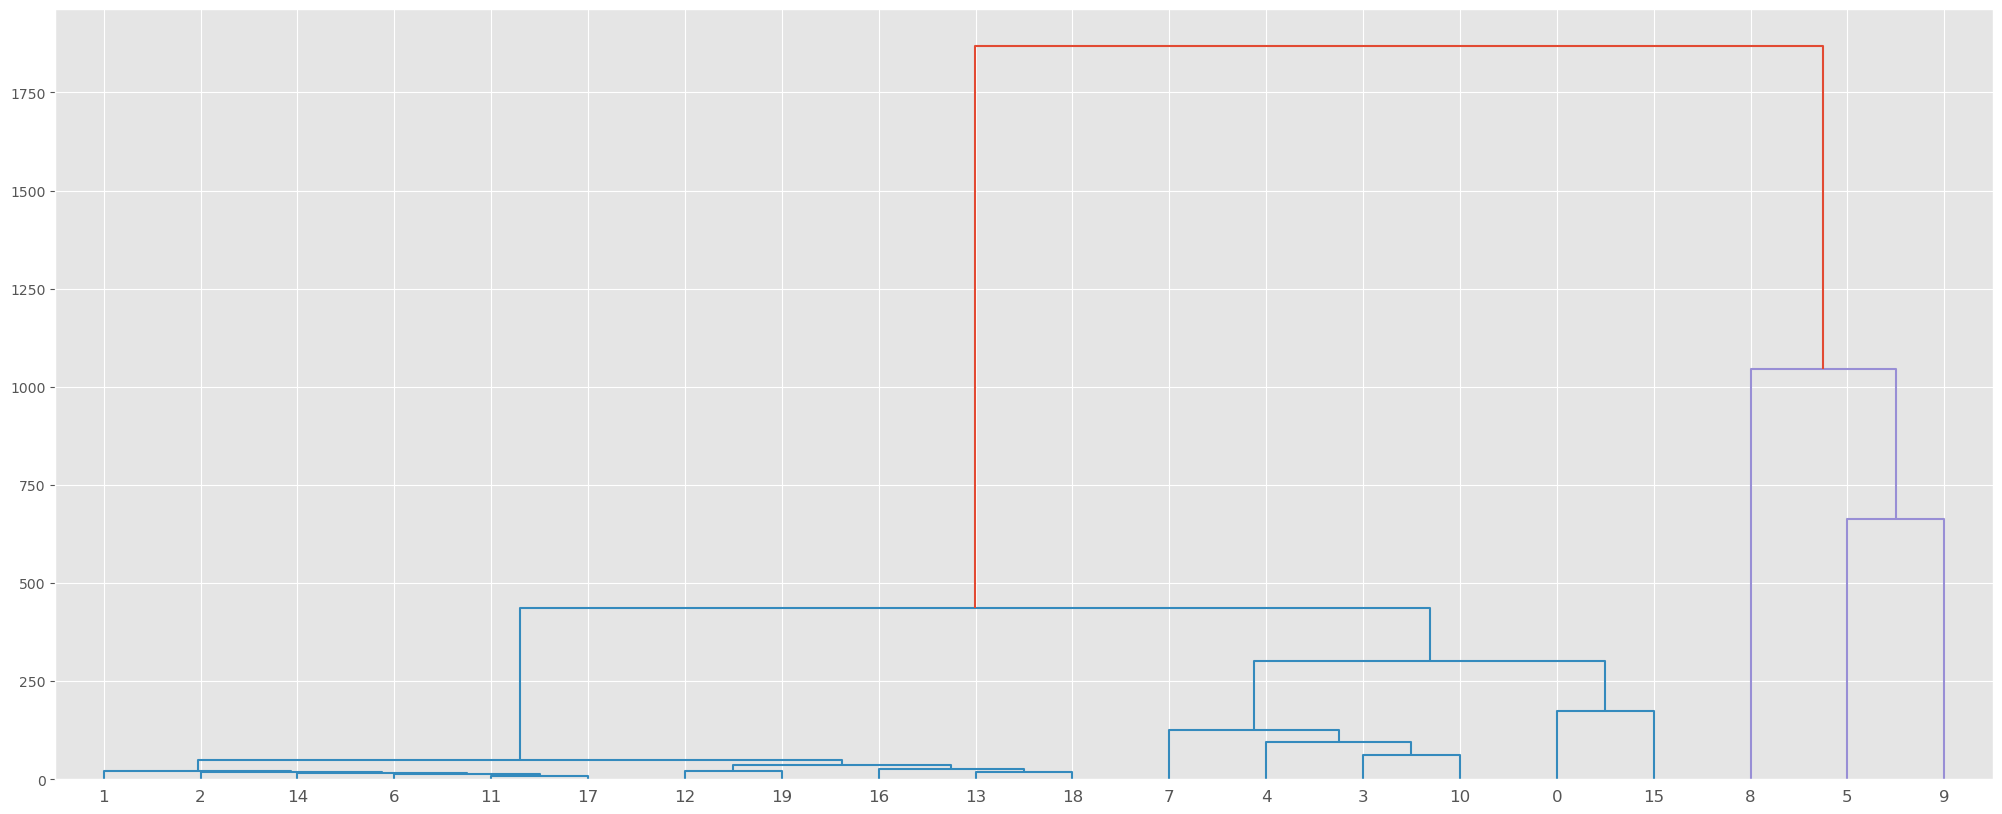

In [13]:
Z = linkage(a, linkage_style)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()